In [40]:
import pandas as pd
import numpy as np


path="pathtodata"


In [41]:
data=pd.read_excel(path+"ANZ synthesised transaction dataset.xlsx")

In [42]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [43]:
data["extraction"]=pd.to_datetime(data.extraction)
data["extraction_month"]=data.extraction.dt.month
data["extraction_week"]=data.extraction.dt.week


In [20]:
data.groupby(["extraction_month"]).amount.mean()

extraction_month
8     185.121867
9     182.045903
10    196.427323
Name: amount, dtype: float64

In [21]:
data.groupby(["status"]).amount.mean()

status
authorized     40.153732
posted        451.552901
Name: amount, dtype: float64

In [22]:
data.groupby(["gender"]).amount.mean()

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64

In [29]:
mean_age=data.groupby(["age"]).amount.mean()
mean_age

age
18    179.060271
19    210.754286
20    152.838471
21    200.898963
22    260.258170
23    250.921942
24    104.221571
25    153.128427
26     98.939406
27    141.127156
28    185.970314
29    274.523358
30    182.259419
31    165.635098
33    164.179137
34    189.236108
35    300.101667
37    130.489420
38    181.984211
39    214.446855
40    229.531932
41    154.992231
42    317.231595
43    196.666554
44    210.052813
46    258.930000
47    211.213636
50    307.334318
52    418.742468
53    222.862603
64    120.311591
69    183.139412
78    318.977941
Name: amount, dtype: float64

In [30]:
mean_age[mean_age==mean_age.max()] #binning


age
52    418.742468
Name: amount, dtype: float64

C:\Users\nmo58\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


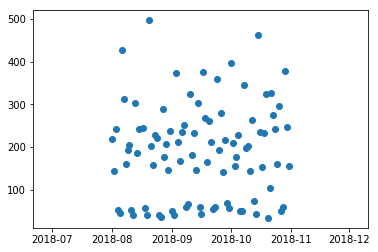

In [49]:
import matplotlib.pyplot as plt
transactio_perday= data.groupby("date").amount.mean()
transactio_perday.to_csv(path+"per_day_amount.csv")
plt.scatter(transactio_perday.index,transactio_perday.values)
plt.show()

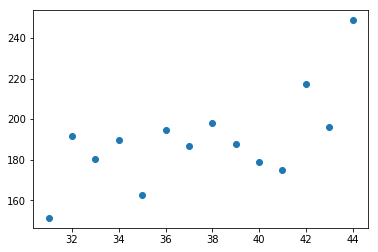

C:\Users\nmo58\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [50]:
import matplotlib.pyplot as plt
transactio_per_w= data.groupby("extraction_week").amount.mean()
plt.scatter(transactio_per_w.index,transactio_per_w.values)
plt.show()
transactio_per_w.to_csv(path+"per_w_amount.csv")

In [64]:
suburbs_avg=data.groupby(["merchant_suburb"]).amount.mean()
suburbs_avg[suburbs_avg==suburbs_avg.max()],suburbs_avg # don't have the merchant data

(merchant_suburb
 Pantapin    829.765
 Name: amount, dtype: float64, merchant_suburb
 Abbotsford           400.858000
 Aberdeen              26.225000
 Aberfeldie            57.770000
 Aberfoyle Park        42.460000
 Acacia Ridge          10.300000
 Adelaide              40.582727
 Adelaide Airport      61.115000
 Advancetown           45.130000
 Airport West          24.564000
 Albany                25.592069
 Albert Park           42.570000
 Alberton              13.050000
 Albion                69.833333
 Albion Park Rail      20.540000
 Alderley              18.750000
 Aldgate               80.820000
 Alexander Heights     32.410000
 Alexandra             20.125000
 Alexandra Hills       13.475714
 Alexandria            53.126429
 Algester              19.620000
 Alice Spring           9.350000
 Allambie Heights      21.865000
 Allenby Gardens       19.960000
 Allora                 4.715000
 Alphington           229.560000
 Alpine                30.730000
 Alstonville           1

In [63]:
data[data.amount==data.amount.max()] # don't have the merchant data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_month,extraction_week
2401,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,...,NaN,2018-08-20 13:00:00+00:00,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,NaN,credit,8,34
6529,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,...,NaN,2018-09-20 13:00:00+00:00,8835.98,854ded55d0034ac8b9e91e16334768ca,Australia,CUS-1816693151,NaN,credit,9,38
10429,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,...,NaN,2018-10-19 13:00:00+00:00,8835.98,873a3f11d03d41a99c55a5b1a3850e1a,Australia,CUS-1816693151,NaN,credit,10,42
10430,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,...,NaN,2018-10-19 13:00:00+00:00,8835.98,d996300131a641c8bf25f86e1aef9bc6,Australia,CUS-1816693151,NaN,credit,10,42
